#### PCA (Principle Componet Analysis) - 주성분 분석

#### 여러개의 변수 (특성 Feature) 대표할 수 있는 주성분 이라는 새로운 변수를 만듬

#### 여러개의 3차원 즉 3D 이미지가 있는데 그 이미지를 잘 설명할 수 있는 2차원즉 2D 이미지(그림자)를 찾는다.



### 1단계 : 데이터 표준화(Standardization)
```
각 변수의 평균을 0 으로 , 분산을 1 로 만들어서 모든 데이터가 동일한 스케일
표준화를 해야하는 이유가 생각이 안나면 평균적인 키(3자리)와 몸무게(2자리)를 생각하자.
```


In [ ]:
# %conda install pandas scikit-learn

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 예제데이터 붓꽃
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target # 정답 (꽃의 종류: 0, 1, 2)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# 데이터 표준화
scaler = StandardScaler()
X = df.drop('target', axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled



array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

#### 2단계 : 공분산 행열 계산 (Coveriance Matrix)
```
공분산 : 두 변수가 함께 어떻게 변하는지를 나타내는 값
양수 : 한 변수가 증가할때 같이 증가
음수 : 반대
공분산 행열 : 모든 변수 쌍들의 공분산을 행열로 정리한 것 - 이 행열을 통해서 데이터가 어떤 방향으로 퍼져있는지 알 수 있음
```

#### 3단계 : 고유값과 고유벡터 계산
```
공분산 행열을 이요해서 고유값 고유벡터를 찾는다.
고유값 벡터 : 데이터가 어떤 방향으로 가장 크게 분산(퍼져 있는 정도) 되어 있지를 나타내는 방향 벡터 이방향이 새로운 축 즉 , 주성분
고유값 : 해당 고유벡터 방향으로 데이터가 얼마나 많이 퍼져있는지를 나타내는 힘의 크기 , 이 값이 크면 그 방향이 데이터를 더 많이 설명한다는 의미

PCA : 고유값의 크기 순서에 따라서 제1주성분(PC1) , 제2주성분(PC2)등...
PC1 데이터를 가장 잘 설명하는 축이고 PC2는 PC1과 직각을 이루면서 그 다음으로 데이터를 잘 표현한다.
```

#### 4단계 : 주성분 결정 및 데이터 변환
```
계산된 고유벡터축에 원래 데이터를 투영(projection)하여 차원을 축소함
붓꽃은 4개의 특성을 2개의 주성분(2차원)으로 변환해서 시각화
```

[0.72962445 0.22850762]


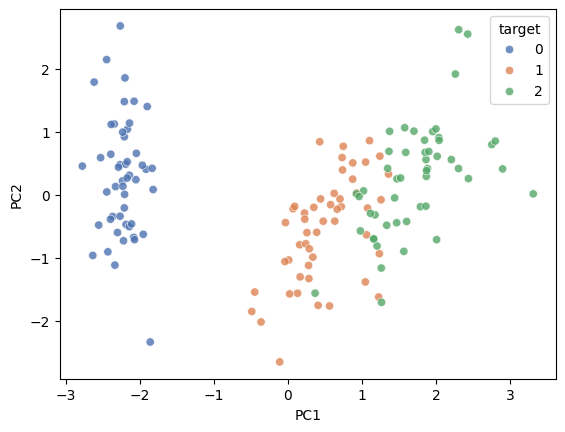

In [ ]:
# 2 3 4 단계 : PCA 수행 및 데이터 변환

pca = PCA(n_components=2) # 2개를 만들겠다,,
pricipleComponent = pca.fit_transform(X_scaled)
# 주성분 분석 결과를 DataFrame으로 변환
pc_df = pd.DataFrame(data=pricipleComponent,columns=['PC1','PC2'])
pc_df['target'] = df.target

# 각 주성분이 설명하는 분산의 양 (고유값의 중요도) 얼마나 많이 가지고 있느냐
print(pca.explained_variance_ratio_) # 주성분 2개만으로도 전체대비 95.7%를 설명할 수 있다.

# 시각화
sns.scatterplot(data=pc_df, x='PC1',y='PC2',hue='target',alpha=0.8,palette='deep')
plt.show()




In [1]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor # 예측하게 도와주는 애
# 데이터셋 예측
datasets.load_diabetes
# 1. 적절한 데이터 전처리
# 2. 모델을 적용해서 score 를 확인

###################################
# 1. 적절한 데이터 전처리를 가지고 PCA로 주성분을 적당한 개수(2개,3개)로 설정해서 데이터를 변환해서 모델을 적용해서 score 확인해보자




<function sklearn.datasets._base.load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)>

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor # 예측하게 도와주는 애
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes(as_frame=True)
x = diabetes.data
y = diabetes.target
# 1. 적절한 데이터 전처리
x_scaled = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor(max_depth=4)
rfr.fit(x_train,y_train)
#2. 모델을 적용해서 score를 확인
print(f'non pca train score : {rfr.score(x_train,y_train)}')
print(f'non pca train score : {rfr.score(x_test,y_test)}')

# 1. 적절한 데이터 전처리를 가지고 PCA로 주성분을 적당한 개수(2개,3개)로 설정해서 데이터를 변환해서 모델을 적용해서 score 확인해보자
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# 2. 모델학습
rfr = RandomForestRegressor(max_depth=4) #RandomForestRegressor 안에 있는 여러가지 값들이 하이퍼 파라메터임.! 이걸로 성능 튜닝 가능함!
rfr.fit(x_train_pca,y_train)
# 3. 모델을 적용하여 score 확인
print(f'pca train score : {rfr.score(x_train_pca,y_train)}')
print(f'pca train score : {rfr.score(x_test_pca,y_test)}')





non pca train score : 0.6594772207523409
non pca train score : 0.469443866438108
pca train score : 0.4937160146079088
pca train score : 0.2923424885947772


In [ ]:
# 하이퍼 파라메터 튜닝 gridsearch
# 학습에 영향을 주는 모든 파라메터를 하이퍼 파라메터라고 함.

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes(as_frame=True) # 성능을 올릴 수 있는 방법은 뭔지?
x = diabetes.data
y = diabetes.target
# 1. 적절한 데이터 전처리
x_scaled = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor() #max_depth=4
# rfr.fit(x_train,y_train)

param_grid = {
    'max_depth' : [3,5,10,12,15],
    'max_features' : ['sqrt','log2'],
    'min_samples_split': [1,2,5,10],
    'min_samples_leaf' : [1,3,5,7]
}

gridcv = GridSearchCV(rfr,return_train_score=True,param_grid=param_grid)

# 학습해주기
gridcv.fit(x_train,y_train)

# #2. 모델을 적용해서 score를 확인
# print(f'non pca train score : {rfr.score(x_train,y_train)}')
# print(f'non pca train score : {rfr.score(x_test,y_test)}')

c:\Users\playdata\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\playdata\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\playdata\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
 

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [13]:
gridcv.best_score_

np.float64(0.4392512230562393)

In [14]:
gridcv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [17]:
gridcv.cv_results_['mean_train_score']

array([       nan, 0.57026557, 0.57034651, 0.56659746,        nan,
       0.56363791, 0.56205804, 0.56522878,        nan, 0.56260214,
       0.56088617, 0.56153656,        nan, 0.55624151, 0.55381311,
       0.55513649,        nan, 0.56999211, 0.56868982, 0.56807229,
              nan, 0.56570778, 0.56625727, 0.56528731,        nan,
       0.56282194, 0.5592555 , 0.56322398,        nan, 0.55550395,
       0.55524836, 0.55395815,        nan, 0.73137892, 0.71906241,
       0.6926238 ,        nan, 0.69936804, 0.69857169, 0.68092504,
              nan, 0.66599678, 0.6644444 , 0.66653785,        nan,
       0.63380253, 0.63435318, 0.63599035,        nan, 0.72982083,
       0.71889131, 0.69456447,        nan, 0.69780262, 0.69976835,
       0.67998535,        nan, 0.66752434, 0.66303182, 0.66500814,
              nan, 0.63470048, 0.63460642, 0.63443465,        nan,
       0.91050012, 0.86890094, 0.78952874,        nan, 0.79563141,
       0.79502189, 0.74866361,        nan, 0.70650809, 0.70779